<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:

<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges.

<p>We will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
    </ul>

</div>

<hr>


In [1]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8487 sha256=5edd0dad391bcf27a4fc758b707c26b4453ffb8d1206dd99598a10a67beeb4d1
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking


In [24]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


## 1. Stocks of Apple Comapany

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [25]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here [https://aroussi.com/post/python-yahoo-finance](https://aroussi.com/post/python-yahoo-finance?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01).


### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [27]:
apple_info=apple.info
apple_info


df  =pd.DataFrame([apple_info])      ## converting to the dataframe 
df1 = df.pop('longBusinessSummary')  ## deleting "longBusinessSummary" feature
df



,zip,sector,fullTimeEmployees,city,phone,state,country,companyOfficers,website,maxAge,...,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,preMarketPrice,logo_url
0,95014,Technology,154000,Cupertino,408 996 1010,CA,United States,[],https://www.apple.com,1,...,1.2,116.21,170.32,False,0.0051,800,171.93,170.59,169.967,https://logo.clearbit.com/apple.com


We can get the <code>'country'</code> using the key country


In [21]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [33]:
apple_share_price_data = apple.history(period="max")


apple_share_price_data.tail(10)   ## geting last 10 rows
apple_share_price_data.describe() ## geting descriptive stats



,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10343.000000,10343.000000,10343.000000,10343.000000,1.034300e+04,10343.000000,10343.000000
mean,12.370612,12.502474,12.237913,12.375567,3.336865e+08,0.000573,0.001644
std,27.321829,27.622114,27.019420,27.335325,3.398825e+08,0.009680,0.086271
min,0.038871,0.038871,0.038434,0.038434,0.000000e+00,0.000000,0.000000
25%,0.234007,0.238808,0.227900,0.233609,1.261520e+08,0.000000,0.000000
50%,0.381923,0.388265,0.374979,0.382140,2.221520e+08,0.000000,0.000000
75%,11.710228,11.801784,11.582237,11.671649,4.154486e+08,0.000000,0.000000
max,181.119995,182.130005,175.529999,179.449997,7.421641e+09,0.220000,7.000000


The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [29]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100453,0.100890,0.100453,0.100453,469033600,0.0,0.0
1980-12-15,0.095649,0.095649,0.095213,0.095213,175884800,0.0,0.0
1980-12-16,0.088661,0.088661,0.088224,0.088224,105728000,0.0,0.0
1980-12-17,0.090408,0.090845,0.090408,0.090408,86441600,0.0,0.0
1980-12-18,0.093029,0.093466,0.093029,0.093029,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [34]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<AxesSubplot:xlabel='Date'>

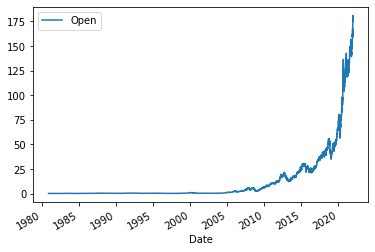

In [35]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history\` function.


In [36]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
Name: Dividends, Length: 73, dtype: float64

We can plot the dividends overtime:


<AxesSubplot:xlabel='Date'>

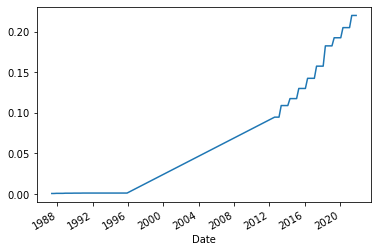

In [37]:
apple.dividends.plot()

## 2. Stocks of AMD company


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [73]:
amd = yf.Ticker("AMD")
amd

yfinance.Ticker object <AMD>

In [74]:
df["country"]

0    United States
Name: country, dtype: object

In [75]:
df['sector']

0    Technology
Name: sector, dtype: object

##### Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [76]:
amd_info = amd.info
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 12600,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides x86 microprocessors for desktop PCs under the AMD Ryzen, AMD Ryzen PRO, Ryzen, Threadripper, AMD A-Series, AMD FX, AMD Athlon, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors for notebook and 2-in-1s under the AMD Ryzen, AMD A-Series, AMD Athlon, AMD Ryzen PRO, AMD Athlon PRO, and AMD Pro A-Series processors brands; microprocessors f

In [77]:
## converting amd_info to dataframe
df1 = pd.DataFrame([amd_info])
df1
 

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,preMarketPrice,logo_url
0,95054,Technology,12600,"Advanced Micro Devices, Inc. operates as a sem...",Santa Clara,408 749 4000,CA,United States,[],https://www.amd.com,...,None,72.5,138.2,False,None,1300,140.94,139.72,136.28,https://logo.clearbit.com/amd.com


In [78]:
## removing unrelevant features
new_df1 = df1.pop("longBusinessSummary")
new_df1
df1

,zip,sector,fullTimeEmployees,city,phone,state,country,companyOfficers,website,maxAge,...,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,regularMarketPrice,preMarketPrice,logo_url
0,95054,Technology,12600,Santa Clara,408 749 4000,CA,United States,[],https://www.amd.com,1,...,None,72.5,138.2,False,None,1300,140.94,139.72,136.28,https://logo.clearbit.com/amd.com


In [81]:
amd_data = amd.history(period="max")   ## geting history of amd stocks
amd_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.000000,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.000000,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.000000,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.000000,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.000000,3.020833,2.906250,2.916667,130800,0,0.0
...,...,...,...,...,...,...,...
2021-12-13,138.250000,139.399994,133.419998,133.800003,42174000,0,0.0
2021-12-14,131.669998,137.240005,130.600006,135.600006,50754600,0,0.0
2021-12-15,135.110001,146.690002,133.809998,146.500000,72425800,0,0.0


In [85]:
amd_data['Volume']

Date
1980-03-17      219600
1980-03-18      727200
1980-03-19      295200
1980-03-20      159600
1980-03-21      130800
                ...   
2021-12-13    42174000
2021-12-14    50754600
2021-12-15    72425800
2021-12-16    63264900
2021-12-17    15771269
Name: Volume, Length: 10531, dtype: int64

In [ ]:
#